## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single Image

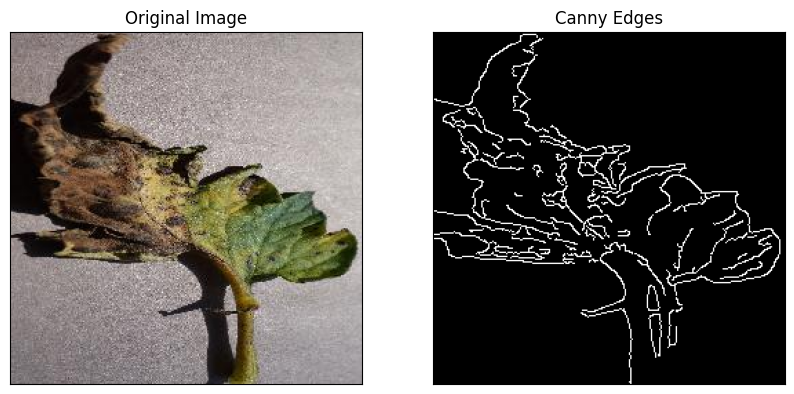

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the image in color
image_path = 'test/TomatoEarlyBlight1.JPG'
img = cv2.imread(image_path)

# Convert the image from BGR to RGB (for displaying with matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise before edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

# Display the original image and the edges side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

# Canny Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.xticks([])
plt.yticks([])

plt.show()


## Testing Model

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 43ms/step


In [14]:
print(predictions)

[[1.23770398e-04 4.97704459e-05 1.45451240e-05 1.71820726e-03
  1.50497408e-06 1.69487437e-03 1.58601310e-07 1.42026856e-05
  9.03331795e-07 4.17180274e-07 6.53514576e-08 1.47897750e-04
  1.94107071e-02 1.55890975e-05 1.40732354e-07 3.41196056e-07
  1.15038638e-04 1.01019039e-04 2.41712951e-05 1.36327662e-06
  6.93216180e-06 7.27040926e-04 2.79136839e-05 1.09419416e-05
  7.49185983e-06 2.74371359e-05 3.20167048e-04 4.70371706e-05
  9.60591296e-06 8.92632976e-02 5.30414402e-01 4.85140458e-03
  2.07274593e-02 1.72356758e-02 1.28713354e-01 1.15076495e-04
  1.83885828e-01 1.74279136e-04]]


In [15]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

30


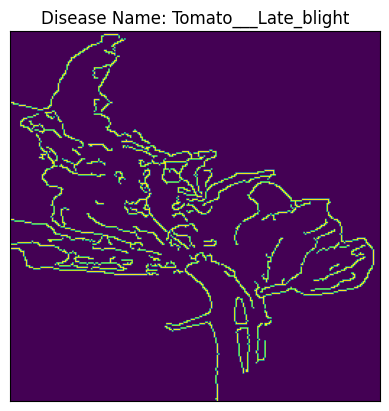

In [21]:
model_prediction = class_name[result_index]
plt.imshow(edges)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()